# LHCb Survey Results

This survey was done two times, in February 2017 and March 2018. The first set of participants were attendees of the first LHCb analysis preservation and reproducibility hackaton. The second set of participants were graduate students (labeled as `student`). We asked them about their expertise on various analysis tools and code sharing. The survey was anonymous. Survey data is stored at `data/physics-survey`.

In [3]:
%run header

In [2]:
# read results
import pandas as pd
df1 = pd.read_csv("data/physics-survey.csv")
wedgeprops = {'linewidth' : .7 , 'edgecolor' : 'black'}

## Survey question: How often do you reproduce final datasets in your analysis?

In [79]:
colors = plt.cm.Set3(np.linspace(0,1,4))
explode = (0.1, 0, 0)
explode1 = (0.1, 0, 0, 0)

a = df1.loc[df1['Student'] == 'Yes'][df1.columns[7]].value_counts()
b = df1.loc[df1['Student'] == 'No'][df1.columns[7]].value_counts()
t = df1[df1.columns[7]].value_counts()
b['Other']=0
a['At most once']=0
a=a.sort_index()
b=b.sort_index()
t=t.sort_index()

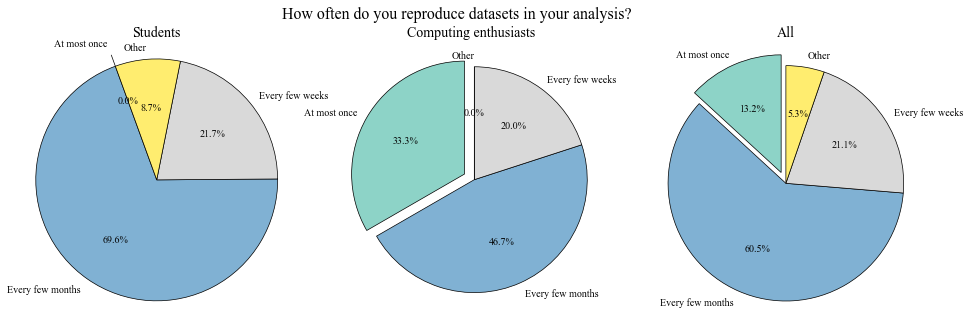

In [81]:
f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))
f.suptitle("How often do you reproduce datasets in your analysis?", fontsize=16)
ax1.pie(tuple(a), explode=explode1, labels=tuple(a.index), autopct='%1.1f%%', 
        shadow=False, startangle=110, colors=colors, wedgeprops=wedgeprops)
ax2.pie(tuple(b), explode=explode1, labels=tuple(b.index), autopct='%1.1f%%', 
        shadow=False, startangle=90, colors=colors, wedgeprops=wedgeprops)
ax3.pie(tuple(t), explode=explode1, labels=tuple(t.index), autopct='%1.1f%%', 
        shadow=False, startangle=90, colors=colors, wedgeprops=wedgeprops)

ax1.set_title("Students", fontsize=14)
ax2.set_title("Computing enthusiasts", fontsize=14)
ax3.set_title("All", fontsize=14)

ax1.axis('equal') 
ax2.axis('equal') 
ax3.axis('equal') 

plt.show()

## Survey question: Do you have access to your colleagues' code?

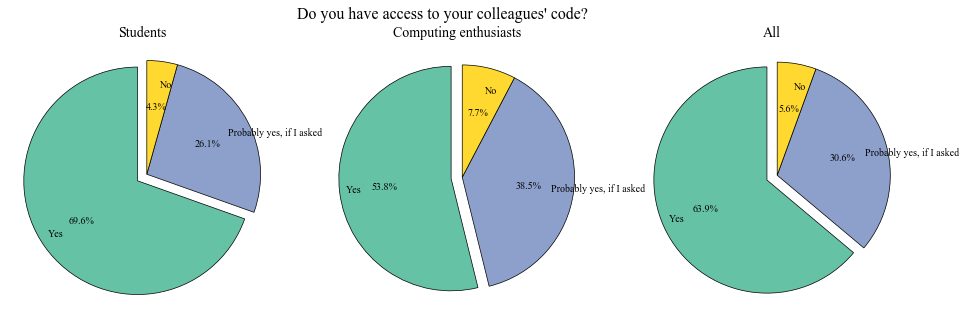

In [4]:
colors = plt.cm.Set2(np.linspace(0,1,4))
explode = (0.1, 0, 0)

a = df1.loc[df1['Student'] == 'Yes'][df1.columns[5]].value_counts()
b = df1.loc[df1['Student'] == 'No'][df1.columns[5]].value_counts()
t = df1[df1.columns[5]].value_counts()

f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))
f.suptitle("Do you have access to your colleagues' code?", fontsize=16)
ax1.pie(tuple(a), explode=explode, labels=tuple(a.index), autopct='%1.1f%%', 
        shadow=False, startangle=90, colors=colors, labeldistance=0.8, wedgeprops=wedgeprops)
ax2.pie(tuple(b), explode=explode, labels=tuple(b.index), autopct='%1.1f%%', 
        shadow=False, startangle=90, colors=colors, labeldistance=0.8, wedgeprops=wedgeprops)
ax3.pie(tuple(t), explode=explode, labels=tuple(t.index), autopct='%1.1f%%', 
        shadow=False, startangle=90, colors=colors, labeldistance=0.8, wedgeprops=wedgeprops)

ax1.set_title("Students", fontsize=14)
ax2.set_title("Computing enthusiasts", fontsize=14)
ax3.set_title("All", fontsize=14)

ax1.axis('equal') 
ax2.axis('equal') 
ax3.axis('equal') 

plt.show()

## Survey question: Do you have a code repository for your analysis?

In [75]:
a = df1.loc[df1['Student'] == 'Yes'][df1.columns[6]].value_counts()
b = df1.loc[df1['Student'] == 'No'][df1.columns[6]].value_counts()
t = df1[df1.columns[6]].value_counts()

# merge git users
a['Yes, on git']=a['Yes, on gitlab']+a['Yes, on github']
a = a[2:]
b['Yes, on git']=b['Yes, on gitlab']
b = b[1:]
t['Yes, on git']=t['Yes, on gitlab']+t['Yes, on github']
t = t[2:]

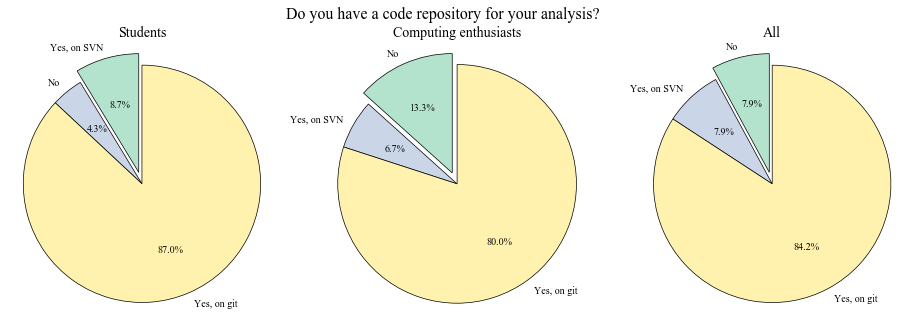

In [77]:
colors = plt.cm.Pastel2(np.linspace(0,1,4))
explode = (0.1, 0, 0)

f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))
f.suptitle("Do you have a code repository for your analysis?", fontsize=16)
ax1.pie(tuple(a), labels=tuple(a.index), explode=explode, autopct='%1.1f%%', 
        shadow=False, startangle=90, colors=colors, wedgeprops=wedgeprops)
ax2.pie(tuple(b), labels=tuple(b.index), explode=explode, autopct='%1.1f%%', 
        shadow=False, startangle=90, colors=colors, wedgeprops=wedgeprops)
ax3.pie(tuple(t), labels=tuple(t.index), explode=explode, autopct='%1.1f%%', 
        shadow=False, startangle=90, colors=colors, wedgeprops=wedgeprops)

ax1.set_title("Students", fontsize=14)
ax2.set_title("Computing enthusiasts", fontsize=14)
ax3.set_title("All", fontsize=14)

ax1.axis('equal') 
ax2.axis('equal') 
ax3.axis('equal') 

plt.show()

# Survey question: How familiar are you with ___ ?

## Students

In [5]:
df1 = df1.replace('Used it once or twice', 'Used it once or\ntwice')
df1 = df1.replace('Customizing it for my purpose', 'Customizing it\nfor my purpose')

options = ['Never used', 'Used it once or\ntwice', 'Using it regularly', 'Customizing it\nfor my purpose']
mapping = {opt: i for i, opt in enumerate(options)}
key = df1[df1.columns[1]].map(mapping)
df1.iloc[key.argsort()]

l = list()
l.append(df1.loc[df1['Student'] == 'Yes'][df1.columns[1]].value_counts()) # docker
l.append(df1.loc[df1['Student'] == 'Yes'][df1.columns[2]].value_counts()) # cont int
l.append(df1.loc[df1['Student'] == 'Yes'][df1.columns[3]].value_counts()) # pipeline sys
l.append(df1.loc[df1['Student'] == 'Yes'][df1.columns[4]].value_counts()) # open stack

# some wild result tuning
for le in l:
    if 'Using it regularly' not in le.index:
        le['Using it regularly'] = 0
    if 'Customizing it\nfor my purpose' not in le.index:
        le['Customizing it\nfor my purpose'] = 0
    if 'Never used' not in le.index:
        le['Never used'] = 0
    if 'Used it once or\ntwice' not in le.index:
        le['Used it once or\ntwice'] = 0

In [6]:
# sorting
custom_sort = {'Never used':0, 'Used it once or\ntwice':1, 'Using it regularly':2, 'Customizing it\nfor my purpose':3}  
nl = list()
for idf in l:
    idf = idf.to_frame()
    idf['inx'] = idf.index
    idf['sorti'] = idf['inx'].map(custom_sort)
    idf = idf.sort_values(by=['sorti'])
    nl.append(idf)
del l

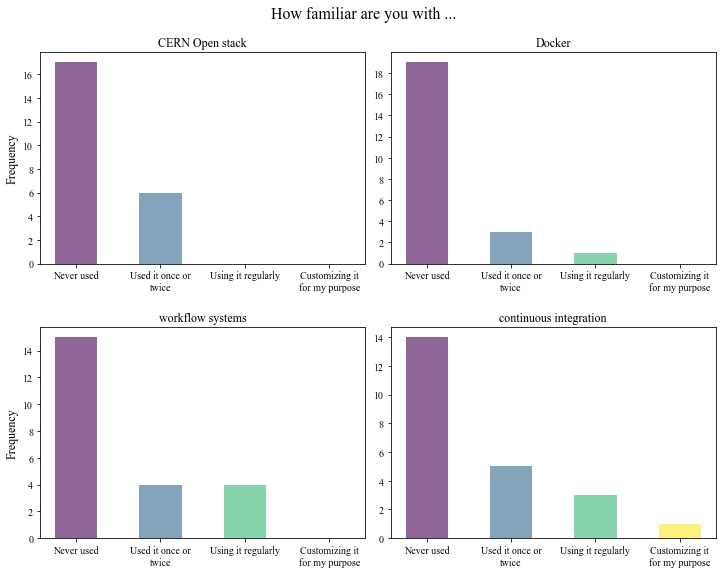

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
fig.suptitle("How familiar are you with ...", fontsize=16)
n_groups = 4
y_pos = [1,2,3,4]
bar_width = 0.5
opacity = 0.6
fontsize = 12
col = plt.cm.viridis(np.linspace(0,1,4))

# first box, open stack
ax1.bar(y_pos, tuple(nl[3][nl[3].columns[0]]), bar_width, alpha=opacity, align='center', color=col)
ax1.set_ylabel('Frequency', fontsize=fontsize)
ax1.set_title('CERN Open stack', fontsize=fontsize)
ax1.set_xticks(y_pos)
ax1.set_xticklabels(tuple(nl[3][nl[3].columns[1]]))

# second
from matplotlib.ticker import MaxNLocator
ax2.set_title("Docker")
ax2.bar(y_pos, tuple(nl[0][nl[0].columns[0]]), bar_width, alpha=opacity, align='center', color=col)
ax2.set_xticks(y_pos)
#ax2.set_ylabel('Frequency', fontsize=fontsize)
ax2.set_xticklabels(tuple(nl[0][nl[0].columns[1]]))
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

# third
ax3.set_ylabel('Frequency', fontsize=fontsize)
ax3.set_title("workflow systems")
ax3.bar(y_pos, tuple(nl[2][nl[2].columns[0]]), bar_width, alpha=opacity, align='center', color=col)
ax3.set_xticks(y_pos)
ax3.set_xticklabels(tuple(nl[2][nl[2].columns[1]]))
ax3.yaxis.set_major_locator(MaxNLocator(integer=True))

# forth
ax4.set_title("continuous integration")
#ax4.set_ylabel('Frequency', fontsize=fontsize)
ax4.bar(y_pos, tuple(nl[1][nl[1].columns[0]]), bar_width, alpha=opacity, align='center', color=col)
ax4.set_xticks(y_pos)
ax4.set_xticklabels(tuple(nl[1][nl[1].columns[1]]))

fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.5)
fig.subplots_adjust(top=0.9)
plt.show()

## Computing enthusiasts

In [8]:
l = list()
l.append(df1.loc[df1['Student'] == 'No'][df1.columns[1]].value_counts()) # docker
l.append(df1.loc[df1['Student'] == 'No'][df1.columns[2]].value_counts()) # cont int
l.append(df1.loc[df1['Student'] == 'No'][df1.columns[3]].value_counts()) # pipeline sys
l.append(df1.loc[df1['Student'] == 'No'][df1.columns[4]].value_counts()) # open stack

# some wild result tuning
for le in l:
    if 'Using it regularly' not in le.index:
        le['Using it regularly'] = 0
    if 'Customizing it\nfor my purpose' not in le.index:
        le['Customizing it\nfor my purpose'] = 0
    if 'Never used' not in le.index:
        le['Never used'] = 0
    if 'Used it once or\ntwice' not in le.index:
        le['Used it once or\ntwice'] = 0

In [9]:
# sorting
custom_sort = {'Never used':0, 'Used it once or\ntwice':1, 'Using it regularly':2, 'Customizing it\nfor my purpose':3}  
nl = list()
for idf in l:
    idf = idf.to_frame()
    idf['inx'] = idf.index
    idf['sorti'] = idf['inx'].map(custom_sort)
    idf = idf.sort_values(by=['sorti'])
    nl.append(idf)
del l

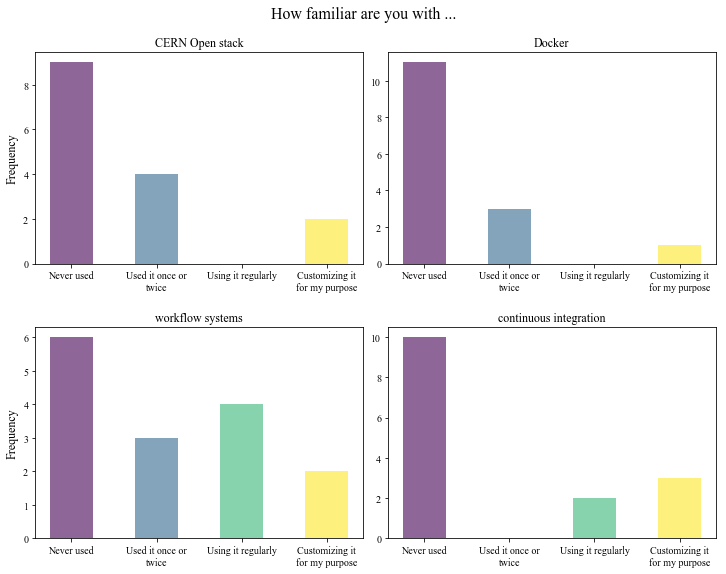

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
fig.suptitle("How familiar are you with ...", fontsize=16)
n_groups = 4
y_pos = [1,2,3,4]
bar_width = 0.5
opacity = 0.6
fontsize = 12
col = plt.cm.viridis(np.linspace(0,1,4))

# first box, open stack
ax1.bar(y_pos, tuple(nl[3][nl[3].columns[0]]), bar_width, alpha=opacity, align='center', color=col)
ax1.set_ylabel('Frequency', fontsize=fontsize)
ax1.set_title('CERN Open stack', fontsize=fontsize)
ax1.set_xticks(y_pos)
ax1.set_xticklabels(tuple(nl[3][nl[3].columns[1]]))

# second
ax2.set_title("Docker")
ax2.bar(y_pos, tuple(nl[0][nl[0].columns[0]]), bar_width, alpha=opacity, align='center', color=col)
ax2.set_xticks(y_pos)
#ax2.set_ylabel('Frequency', fontsize=fontsize)
ax2.set_xticklabels(tuple(nl[0][nl[0].columns[1]]))

# third
from matplotlib.ticker import MaxNLocator
ax3.set_ylabel('Frequency', fontsize=fontsize)
ax3.set_title("workflow systems")
ax3.bar(y_pos, tuple(nl[2][nl[2].columns[0]]), bar_width, alpha=opacity, align='center', color=col)
ax3.set_xticks(y_pos)
ax3.set_xticklabels(tuple(nl[2][nl[2].columns[1]]))
ax3.yaxis.set_major_locator(MaxNLocator(integer=True))

# forth
ax4.set_title("continuous integration")
#ax4.set_ylabel('Frequency', fontsize=fontsize)
ax4.bar(y_pos, tuple(nl[1][nl[1].columns[0]]), bar_width, alpha=opacity, align='center', color=col)
ax4.set_xticks(y_pos)
ax4.set_xticklabels(tuple(nl[1][nl[1].columns[1]]))

fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.5)
fig.subplots_adjust(top=0.9)
plt.show()

## All

In [35]:
l = list()
l.append(df1[df1.columns[1]].value_counts()) # docker
l.append(df1[df1.columns[2]].value_counts()) # cont int
l.append(df1[df1.columns[3]].value_counts()) # pipeline sys
l.append(df1[df1.columns[4]].value_counts()) # open stack

# some wild result tuning
for le in l:
    if 'Using it regularly' not in le.index:
        le['Using it regularly'] = 0
    if 'Customizing it\nfor my purpose' not in le.index:
        le['Customizing it\nfor my purpose'] = 0
    if 'Never used' not in le.index:
        le['Never used'] = 0
    if 'Used it once or\ntwice' not in le.index:
        le['Used it once or\ntwice'] = 0


In [36]:
l[3]

Never used                        26
Used it once or\ntwice            10
Customizing it\nfor my purpose     2
Using it regularly                 0
Name: How familiar are you with: [CERN Open stack], dtype: int64

In [37]:
# sorting
custom_sort = {'Never used':0, 'Used it once or\ntwice':1, 'Using it regularly':2, 'Customizing it\nfor my purpose':3}  
nl = list()
for idf in l:
    idf = idf.to_frame()
    idf['inx'] = idf.index
    idf['sorti'] = idf['inx'].map(custom_sort)
    idf = idf.sort_values(by=['sorti'])
    nl.append(idf)
del l

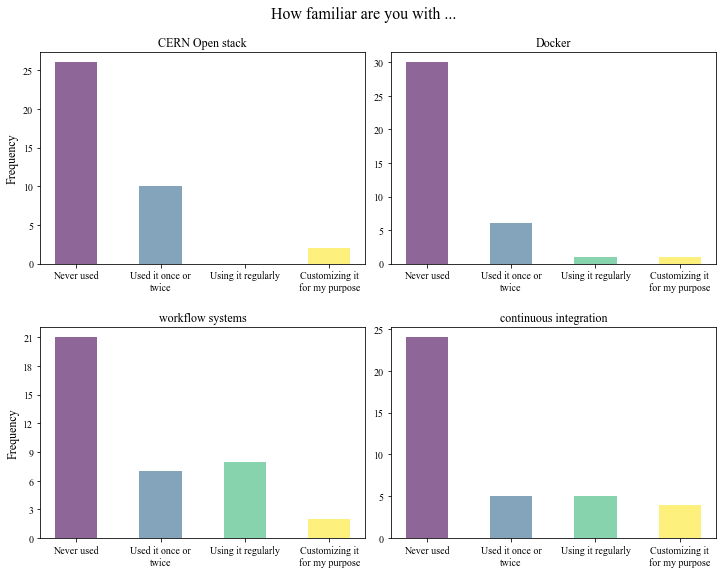

In [38]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
fig.suptitle("How familiar are you with ...", fontsize=16)
n_groups = 4
y_pos = [1,2,3,4]
bar_width = 0.5
opacity = 0.6
fontsize = 12
col = plt.cm.viridis(np.linspace(0,1,4))

# first box, open stack
ax1.bar(y_pos, tuple(nl[3][nl[3].columns[0]]), bar_width, alpha=opacity, align='center', color=col)
ax1.set_ylabel('Frequency', fontsize=fontsize)
ax1.set_title('CERN Open stack', fontsize=fontsize)
ax1.set_xticks(y_pos)
ax1.set_xticklabels(tuple(nl[3][nl[3].columns[1]]))

# second
ax2.set_title("Docker")
ax2.bar(y_pos, tuple(nl[0][nl[0].columns[0]]), bar_width, alpha=opacity, align='center', color=col)
ax2.set_xticks(y_pos)
#ax2.set_ylabel('Frequency', fontsize=fontsize)
ax2.set_xticklabels(tuple(nl[0][nl[0].columns[1]]))

# third
from matplotlib.ticker import MaxNLocator
ax3.set_ylabel('Frequency', fontsize=fontsize)
ax3.set_title("workflow systems")
ax3.bar(y_pos, tuple(nl[2][nl[2].columns[0]]), bar_width, alpha=opacity, align='center', color=col)
ax3.set_xticks(y_pos)
ax3.set_xticklabels(tuple(nl[2][nl[2].columns[1]]))
ax3.yaxis.set_major_locator(MaxNLocator(integer=True))

# forth
ax4.set_title("continuous integration")
#ax4.set_ylabel('Frequency', fontsize=fontsize)
ax4.bar(y_pos, tuple(nl[1][nl[1].columns[0]]), bar_width, alpha=opacity, align='center', color=col)
ax4.set_xticks(y_pos)
ax4.set_xticklabels(tuple(nl[1][nl[1].columns[1]]))

fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.5)
fig.subplots_adjust(top=0.9)
plt.show()

fig.savefig('familiar_tool.pdf', dpi=100)

## Software usage in physics analyses

In [39]:
dr = df1[df1.columns[8]].str.split(";")

slist =[]
for x in dr:
    slist.extend(x)
    
df = pd.DataFrame(slist, columns=['response'])
vc = df['response'].value_counts()
df2 = vc.to_frame()
df2

,response
python,36
ROOT,34
C++,28
bash scripts,22
Official experiment software,20
makefile,14
snakemake,1
R,1
Htcondor and dagman,1


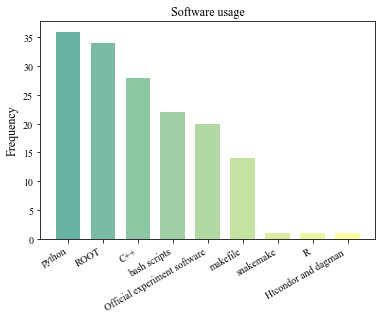

In [42]:
col = plt.cm.summer(np.linspace(0,1,len(df2)))
bar_width = 0.7
fig, ax = plt.subplots()
ax.set_title("Software usage")
ax.set_ylabel('Frequency', fontsize=fontsize)
y_pos = np.arange(1, len(df2)+1)
ax.bar(y_pos, tuple(df2['response']), bar_width, alpha=opacity, align='center', color=col)
ax.set_xticks(y_pos)
ax.set_xticklabels(tuple(df2.index))

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

fig.tight_layout()
fig.savefig('software.pdf', dpi=100)